In [2]:
%matplotlib inline
import geopandas as gpd
import matplotlib.pyplot as pyplot
 
import sys
sys.path.insert(0, "../")
from weavingspace.weave_unit import WeaveUnit
from weavingspace.tile_unit import TileUnit
from weavingspace.tile_map import Tiling

**Note: to speed up the tilings make the spacing larger (it's in metres) and set aspect to 1 (the latter will double the speed more or less).**

In [3]:
dem = gpd.read_file("data/dem-4vars.gpkg")
dem.columns

Index(['elevation', 'shade', 'slope', 'aspect', 'geometry'], dtype='object')

<Axes: >

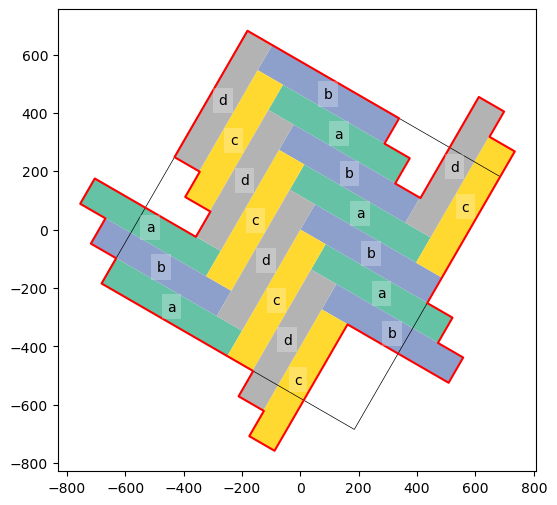

In [4]:
w1 = WeaveUnit(weave_type = "twill", n = 5, spacing = 100, aspect = 1.,
               strands = "ab|cd", crs = dem.crs).transform_rotate(60)
w1.plot(r = 0, cmap = "Set2", figsize = (18, 6))

In [5]:
weave = Tiling(w1, dem, id_var = "ID")

id_var is no longer required and will be deprecated soon.
            A temporary unique index attribute is added and removed when 
            generating the tiled map.


/opt/miniconda3/envs/weaving/lib/python3.13/site-packages/shapely/constructive.py:996: RuntimeWarning: divide by zero encountered in oriented_envelope
  return lib.oriented_envelope(geometry, **kwargs)


In [6]:
textile = weave.get_tiled_map(# prioritise_tiles = True, ragged_edges = True, 
                                debug = True)

STEP 1: prep data (rotation if requested): 0.027
STEP A2: overlay zones with tiling: 3.922
STEP A3: calculate areas: 0.003
STEP A4: drop columns prior to join: 0.002
STEP A5: build lookup for join: 0.031
STEP A6: perform lookup join: 0.012


In [7]:
textile.variables = ["elevation", "slope", "aspect", "shade"]
textile.colourmaps = dict(zip(textile.variables, 
                              ["terrain", "Reds", "jet", "Greys"] * 4))

Only a list of variables specified, assigning to
            available tile_ids.


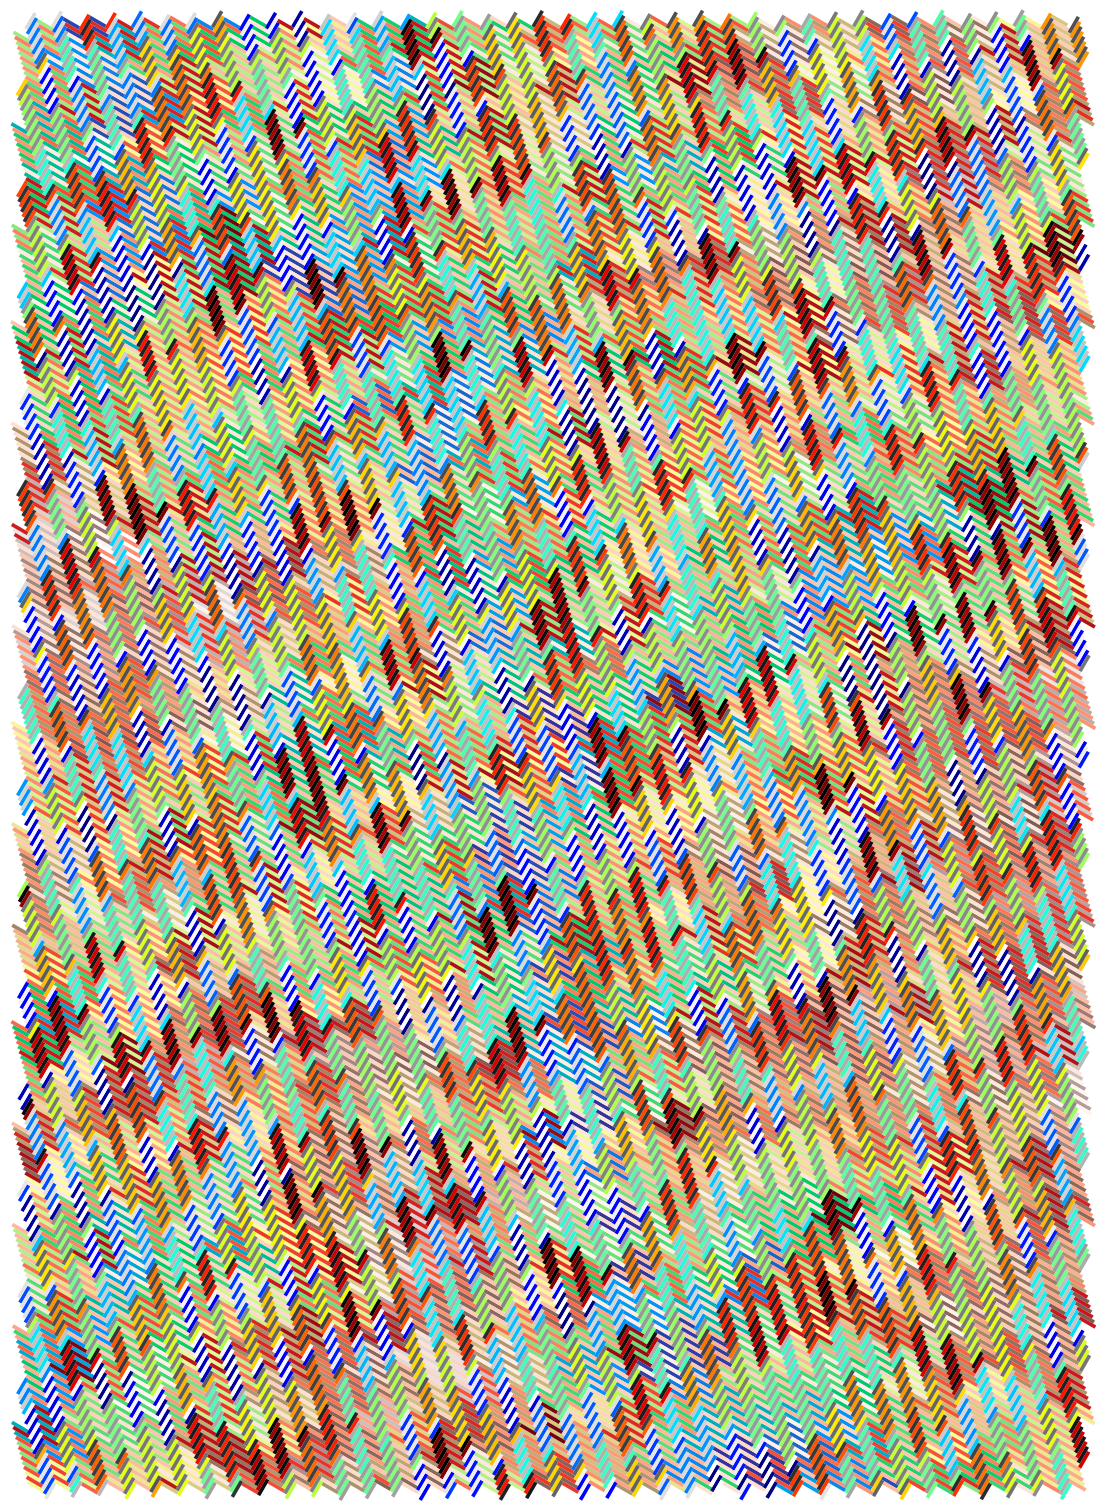

In [8]:
fig = textile.render(legend = False, linewidth = 0)

<Axes: >

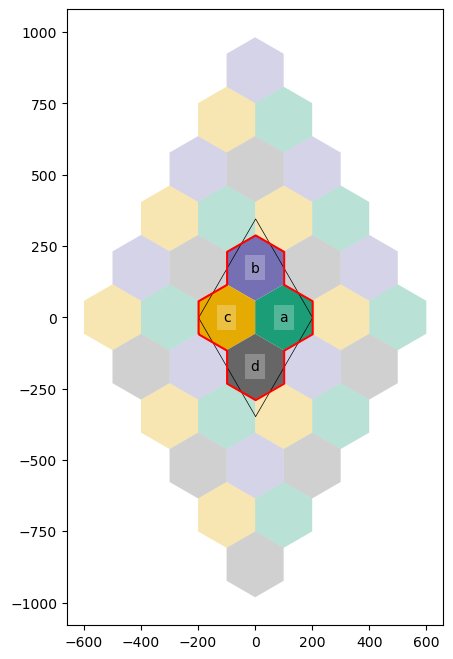

In [9]:
tile_unit = TileUnit(tiling_type = "hex-colouring", n = 4, code = "4.8.8",
                     spacing = 400, crs = dem.crs)#.transform_rotate(-45)
tile_unit.plot(r = 1)

/opt/miniconda3/envs/weaving/lib/python3.13/site-packages/shapely/constructive.py:996: RuntimeWarning: divide by zero encountered in oriented_envelope
  return lib.oriented_envelope(geometry, **kwargs)


STEP 1: prep data (rotation if requested): 0.028
STEP A2: overlay zones with tiling: 5.813
STEP A3: calculate areas: 0.004
STEP A4: drop columns prior to join: 0.003
STEP A5: build lookup for join: 0.188
STEP A6: perform lookup join: 0.012
Only a list of variables specified, assigning to
            available tile_ids.


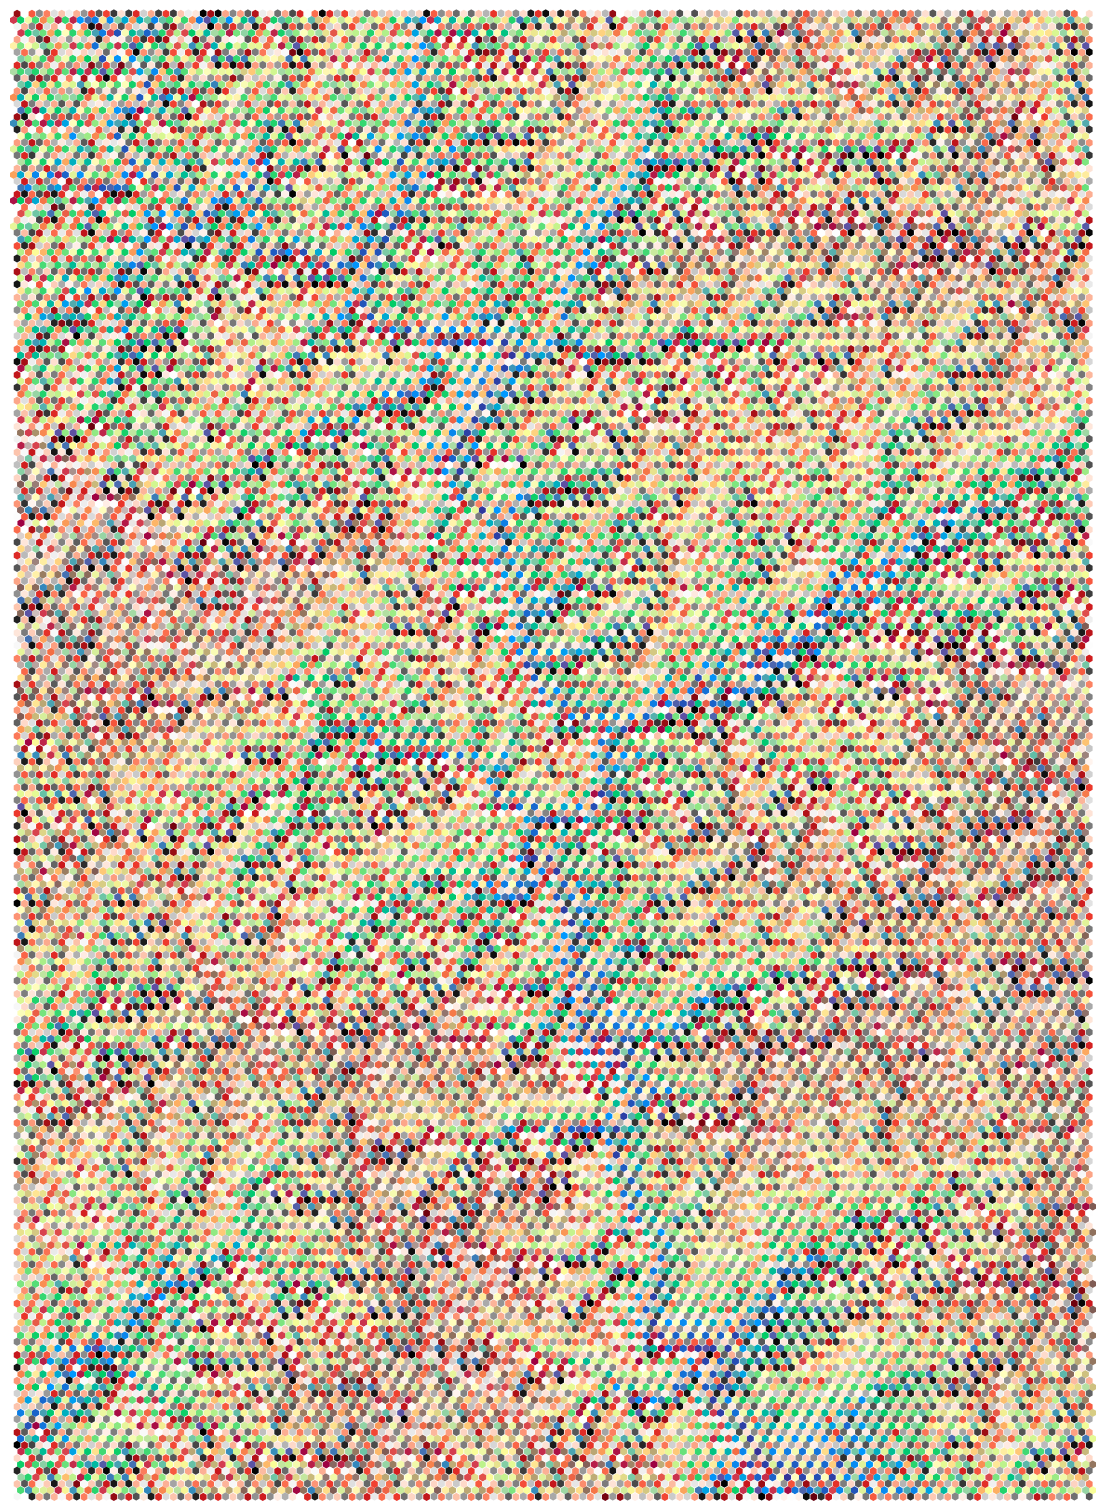

In [10]:
tiling = Tiling(tile_unit, dem, prototile_margin = 10)
t = tiling.get_tiled_map(debug = True)
t.variables = ["elevation", "slope", "aspect", "shade"]
t.colourmaps = dict(zip(t.variables,
                        ["terrain", "Reds", "Spectral", "Greys"] * 4))
fig = t.render(legend = False)